In [8]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import RMSprop, Adam
from keras.metrics import Accuracy
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [21]:
def plot_training_history(history):
    """
    Plot training history showing loss/val_loss and accuracy/val_accuracy

    Parameters:
    history: History object returned by model.fit()
    """

    # Create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot 1: Loss and Validation Loss
    ax1.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
    ax1.plot(history.history['val_loss'], label='Validation Loss', color='red', linewidth=2)
    ax1.set_title('Model Loss', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Loss', fontsize=12)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot 2: Accuracy and Validation Accuracy
    ax2.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linewidth=2)
    ax2.set_title('Model Accuracy', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Accuracy', fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print final metrics
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]

    print(f"\nFinal Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")
    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


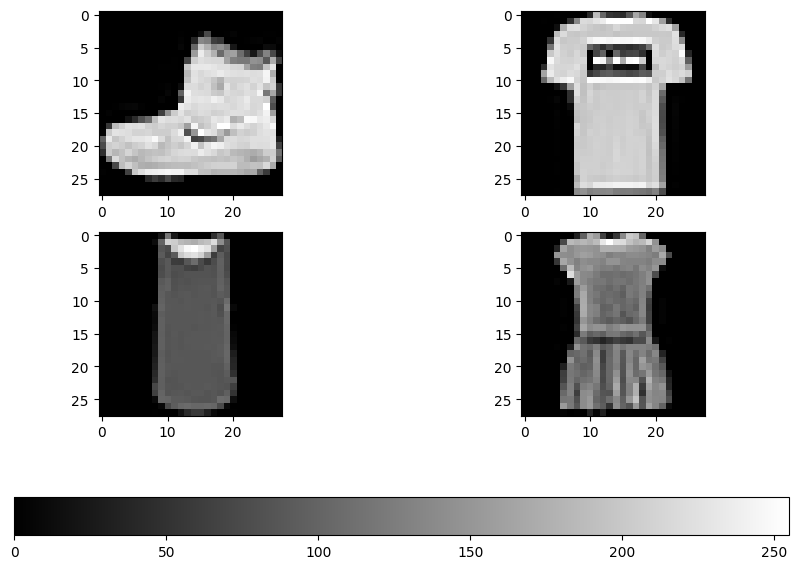

In [10]:
fig , axs = plt.subplots(2,2, figsize=(10,7))
images = []
for ax, data in zip(axs.flat, train_images):
    images.append(ax.imshow(data, cmap='gray'))
fig.colorbar(images[0], ax=axs, orientation= 'horizontal', fraction=.1)

In [11]:
print(f"images shape: {train_images.shape} and label shape: {train_labels.shape}")
print(f"test images shape: {test_images.shape} and test label shape: {test_labels.shape}")

images shape: (60000, 28, 28) and label shape: (60000,)
test images shape: (10000, 28, 28) and test label shape: (10000,)


In [12]:
x_test_reshaped = test_images.reshape(-1,28,28,1)
x_train_reshaped = train_images.reshape(-1,28,28,1)
categorical_test_labels = keras.utils.to_categorical(test_labels)
categorical_train_labels = keras.utils.to_categorical(train_labels)

In [13]:
print(f"images shape: {x_train_reshaped.shape} and label shape: {categorical_train_labels.shape}")
print(f"images shape: {x_test_reshaped.shape} and label shape: {categorical_test_labels.shape}")

images shape: (60000, 28, 28, 1) and label shape: (60000, 10)
images shape: (10000, 28, 28, 1) and label shape: (10000, 10)


In [52]:
simple_conv_model = Sequential()
simple_conv_model.add(keras.Input(shape=(28,28,1)))
simple_conv_model.add(Conv2D(32,(3,3),activation='relu'))
simple_conv_model.add(Conv2D(64,(3,3),activation='relu'))
simple_conv_model.add(MaxPooling2D((2,2)))
simple_conv_model.add(Conv2D(128,(3,3),activation='relu'))
simple_conv_model.add(MaxPooling2D((2,2)))
simple_conv_model.add(Flatten())
simple_conv_model.add(Dense(64,activation='relu'))
simple_conv_model.add(Dropout(0.5))
simple_conv_model.add(Dense(10, activation='softmax'))

simple_conv_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │       204,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 298,186 (1.14 MB)

 Trainable params: 298,186 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
simple_conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
history = simple_conv_model.fit(x_train_reshaped,categorical_train_labels, epochs=12, batch_size=100, validation_split=0.2)

Epoch 1/12
480/480 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.2062 - loss: 2.8338 - val_accuracy: 0.6342 - val_loss: 1.2186
Epoch 2/12
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5281 - loss: 1.2533 - val_accuracy: 0.8412 - val_loss: 0.4349
Epoch 3/12
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8059 - loss: 0.5454 - val_accuracy: 0.8823 - val_loss: 0.3300
Epoch 4/12
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8558 - loss: 0.4065 - val_accuracy: 0.8916 - val_loss: 0.2958
Epoch 5/12
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8691 - loss: 0.3618 - val_accuracy: 0.8981 - val_loss: 0.2871
Epoch 6/12
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8804 - loss: 0.3280 - val_accuracy: 0.8934 - val_loss: 0.2954
Epoch 7/12
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8890 - loss: 0.3078 - val_accuracy: 0.9055 - val_loss: 0.2611
Epoch 8/12
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9007 - loss: 0.2793 - val_accuracy: 0.

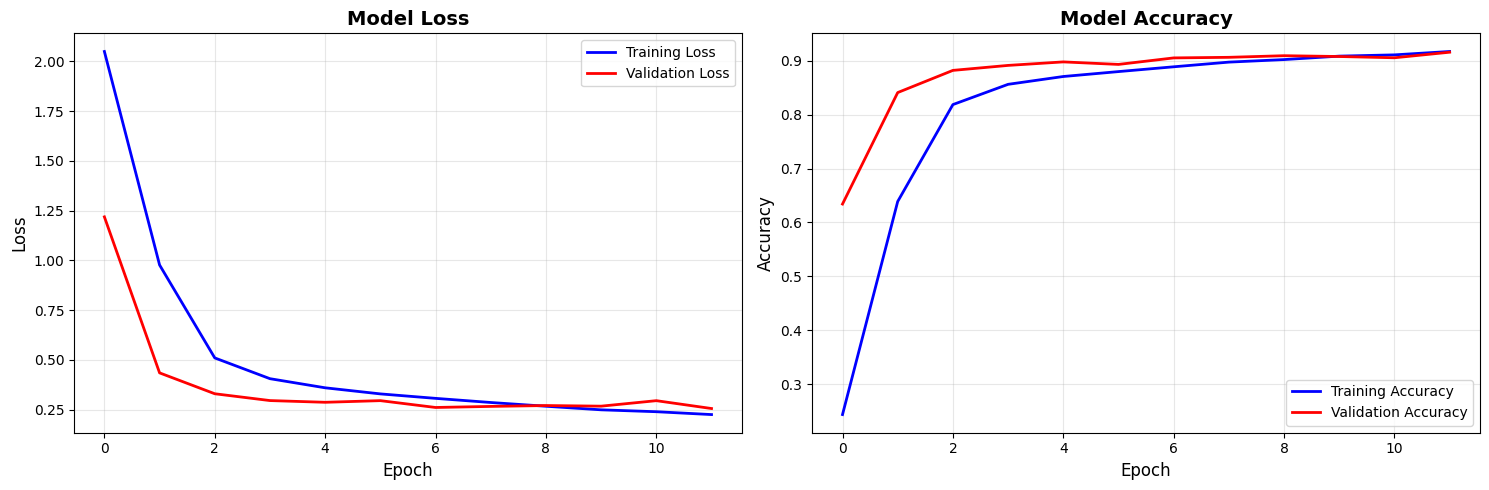


Final Training Loss: 0.2254
Final Validation Loss: 0.2558
Final Training Accuracy: 0.9174
Final Validation Accuracy: 0.9161


In [55]:
plot_training_history(history)

In [ ]:
x_train_normalized = train_images.astype('float32')
x_test_normalized = test_images.astype('float32')

x_train_normalized /= 255
x_train_normalized /= 255

x_train_normalized_reshaped = x_train_normalized.reshape(-1,28,28,1)
x_test_normalized_reshaped = x_test_normalized.reshape(-1,28,28,1)

x_test_normalized_reshaped.shape

(10000, 28, 28, 1)

In [ ]:
simple_conv_model.fit(x_train_normalized_reshaped, categorical_train_labels,epochs=20, batch_size=200, validation_split=0.2)

Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.0998 - loss: 4.8800 - val_accuracy: 0.0957 - val_loss: 2.4824
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.1022 - loss: 2.5940 - val_accuracy: 0.0957 - val_loss: 2.4149
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1028 - loss: 2.5046 - val_accuracy: 0.0957 - val_loss: 2.4058
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.1027 - loss: 2.4479 - val_accuracy: 0.0957 - val_loss: 2.3804
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.1020 - loss: 2.4070 - val_accuracy: 0.0957 - val_loss: 2.3483
Epoch 6/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1004 - loss: 2.3765 - val_accuracy: 0.0957 - val_loss: 2.3317
Epoch 7/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1005 - loss: 2.3504 - val_accuracy: 0.0957 - val_loss: 2.3191
Epoch 8/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1015 - loss: 2.3347 - val_accu

In [ ]:
# model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss=categorical_crossentropy,optimizer=RMSprop(learning_rate=0.01), metrics=[Accuracy])

In [ ]:
print(x_train.shape)
print(categorical_train_labels.shape)
categorical_train_labels[5]
x_train[0]

(60000, 784)
(60000, 10)


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
history = model.fit(x_train,categorical_train_labels,batch_size=100, epochs=100, validation_split=0.2)

Epoch 1/300
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0015 - loss: 0.7213 - val_accuracy: 0.0062 - val_loss: 0.4985
Epoch 2/300
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0071 - loss: 0.4601 - val_accuracy: 0.0111 - val_loss: 0.5545
Epoch 3/300
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0124 - loss: 0.4208 - val_accuracy: 0.0203 - val_loss: 0.4755
Epoch 4/300
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0187 - loss: 0.4000 - val_accuracy: 0.0232 - val_loss: 0.4354
Epoch 5/300
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0272 - loss: 0.3804 - val_accuracy: 0.0376 - val_loss: 0.4335
Epoch 6/300
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0352 - loss: 0.3719 - val_accuracy: 0.0410 - val_loss: 0.4720
Epoch 7/300
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0448 - loss: 0.3604 - val_accuracy: 0.0359 - val_loss: 0.4405
Epoch 8/300
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0512 - loss: 0.3559 - val_accu

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

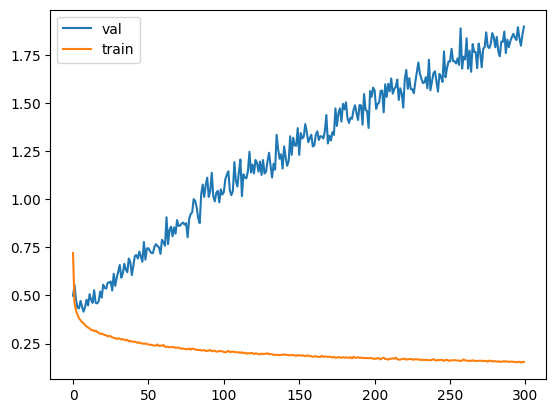

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['val', 'train'])

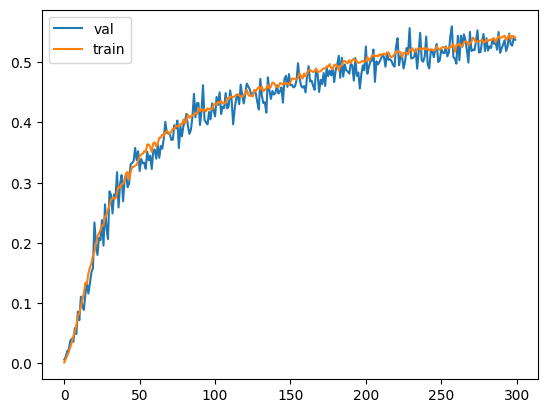

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['val', 'train'])

In [ ]:
x_test.shape
categorical_test_labels.shape
loss, acc = model.evaluate(x_test, categorical_test_labels)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5398 - loss: 1.8868

Testing loss: 1.89, acc: 0.54%


In [ ]:
predicted = model.predict(x_test)
predicted_classes = np.argmax(predicted, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step


In [ ]:
print("predicted:")
print(predicted_classes)
print("True Label:")
print(test_labels)

predicted:
[9 2 1 ... 8 1 5]
True Label:
[9 2 1 ... 8 1 5]


Text(0, 0.5, 'True label')

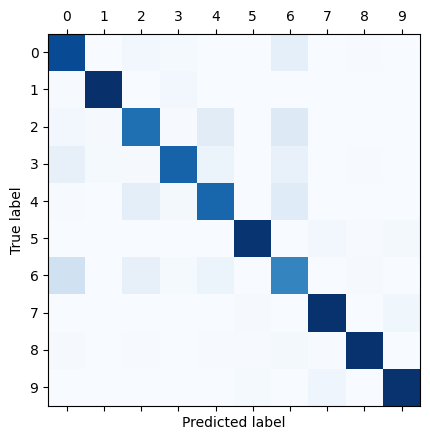

In [ ]:
from sklearn.metrics import confusion_matrix
plt.matshow(confusion_matrix(test_labels, predicted_classes), cmap="Blues")
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label")